In [7]:
import random

import cv2
import matplotlib.pyplot as plt

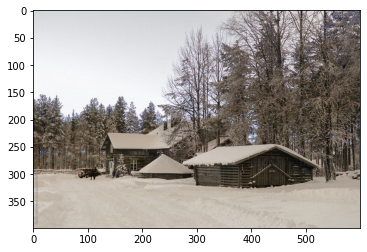

In [8]:
img = cv2.imread('snow village.jpg')
img = cv2.resize(img, None, fx=0.5, fy=0.5)
backup_img = img.copy()

plt.imshow(img)

In [9]:
class snow:
    def __init__(self, x, y):
        self.x = random.randint(-200, x)
        self.y = random.randint(-200, y)
        self.radius = random.randint(1, 3)
        self.speed = random.randint(1, 2)
        self.move_or_not = random.choice([True, False])
    
    def move(self):
        self.y += self.speed
        if self.move_or_not:
            self.x += 1

In [10]:
rows, cols, _ = img.shape

start_pos = int(rows * (0.01))
range_for_rainfall = int(cols * 0.3)

snows = []
for i in range(range_for_rainfall):
    new_snow = snow(cols, start_pos)
    snows.append(new_snow)

In [11]:
images = []
for i in range(200):
    for sno in snows:
        sno.move()

    img = backup_img.copy()
    
    for sno in snows:
        cv2.circle(img, (sno.x, sno.y), sno.radius, (255, 255, 255), -1)
    
    images.append(img)

In [12]:
frame_width, frame_height = int(cols), int(rows)
size = (frame_width, frame_height)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
frame_rate = 10

video_writer = cv2.VideoWriter('output.mp4', fourcc, frame_rate, size)

for frame in images:
    video_writer.write(frame)

video_writer.release()